In [1]:
# импорт библиотек
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
# вспомогательная функция, предназначенная для вычисления RMSE
def rmse(x):
    return np.sqrt(-x)

In [3]:
# получение обучающей выборки
train = pd.read_csv('../data/train.csv')

# получение тестовой выборки
test = pd.read_csv('../data/test.csv')

# Первичный анализ данных

In [4]:
# размерность обучающей выборки
train.shape

(1460, 81)

In [5]:
# размерность тестовой выборки
test.shape

(1459, 80)

In [6]:
# первые 5 записей в обучающей выборке
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# информация о признаках в обучающей выборке
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# числовые характеристики признаков в обучающей выборке
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# первые 5 записей в тестовой выборке
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
# информация о признаках в тестовой выборке
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [11]:
# числовые характеристики признаков в тестовой выборке
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# Распределение целевого признака

In [12]:
# коэффициент скошенности (асимметрии)
print("Skewness: %.4f" % train['SalePrice'].skew())

# коэффициент эксцесса
print("Kurtosis: %.4f" % train['SalePrice'].kurt())

Skewness: 1.8829
Kurtosis: 6.5363


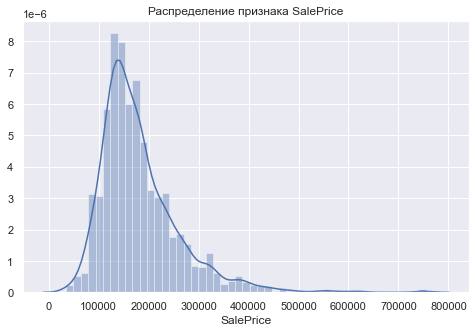

In [13]:
# график распредения целевого признака
plt.figure(figsize=(8, 5))
plt.title("Распределение признака SalePrice")
sns.distplot(train['SalePrice'])

In [14]:
# логарифмическое преобразование значений целевого признака
train['SalePrice'] = np.log1p(train['SalePrice'])

In [ ]:
# коэффициент скошенности после логарифмического преобразования
print("New skewness: %.4f" % train['SalePrice'].skew())

# коэффициент эксцесса после логарифмического преобразования
print("New kurtosis: %.4f" % train['SalePrice'].kurt())

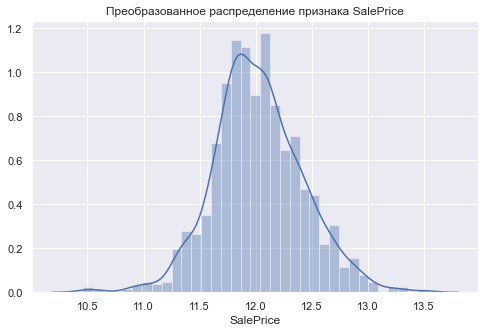

In [15]:
# график функции распределения целевого признака после логарифмического преобразование
plt.figure(figsize=(8, 5))
plt.title("Преобразованное распределение признака SalePrice")
sns.distplot(train['SalePrice'])

# Числовые и категориальные признаки

In [16]:
# получение числовых признаков
numerical_features = train.dtypes[train.dtypes != 'object'].index

# список числовых признаков
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
# кол-во числовых признаков
len(numerical_features)

38

In [18]:
# получение категориальных признаков
categorical_features = train.dtypes[train.dtypes == 'object'].index

# список категориальных признаков
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
# кол-во категориальных признаков
len(categorical_features)

43

# Обработка пропущенных значений

In [20]:
# объединение обучающей и тестовой выборок в единый датасет
df = pd.concat([train, test], axis=0)

In [21]:
# список тех числовых признаков, которые должны быть отображены на графиках
plot_numerical_features = [feature for feature in numerical_features 
                           if feature not in ['SalePrice', 'Id']]

## Числовые признаки

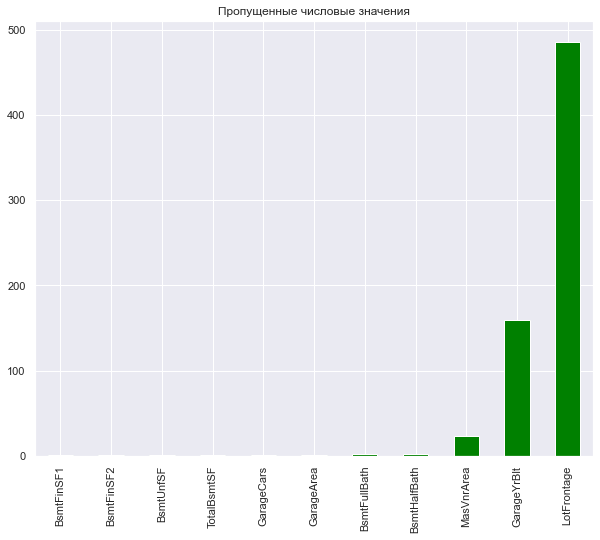

In [22]:
# гистограмма всех пропущенных значений
plt.figure(figsize=(10, 8))
missing_data = df[plot_numerical_features].isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(inplace=True)
missing_data.plot.bar(title='Пропущенные числовые значения', color='green')

In [23]:
# присвоение всем пропущенным значениям признаков их среднего
df[plot_numerical_features] = df[plot_numerical_features].fillna(df[plot_numerical_features].mean())

# количество пропущенных значений
df[plot_numerical_features].isnull().sum().sum()

0

## Категориальные признаки

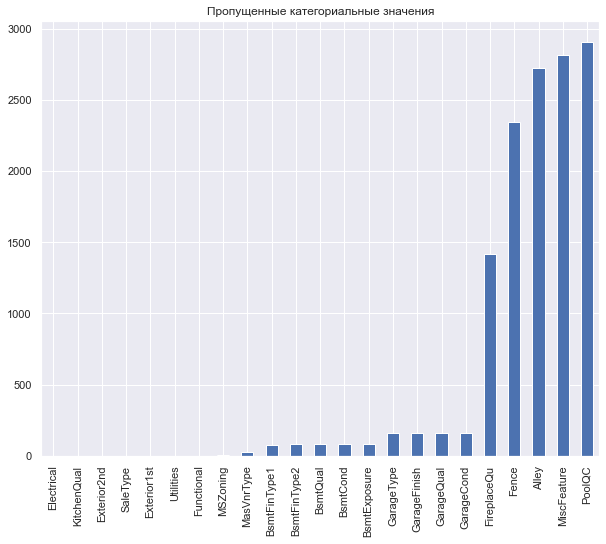

In [24]:
# гистограмма всех пропущенных значений
plt.figure(figsize=(10, 8))
missing_data = df[categorical_features].isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(inplace=True)
missing_data.plot.bar(title='Пропущенные категориальные значения')

In [25]:
# присвоение всем пропущенным значениям признаков значения "None"
df[categorical_features] = df[categorical_features].fillna('None')

# количество пропущенных значений
df[categorical_features].isnull().sum().sum()

0

# Распределения числовых признаков

In [26]:
# нахождение коэффициентов скошенности для каждого распределения
skewness_features = df[numerical_features].apply(lambda x: x.skew()).sort_values(ascending=False)

# находим те числовые признаки, у которых коэффициент скошенности > 0.5
high_skewness_features = skewness_features[abs(skewness_features) > 0.5]

# вывод числовых признаков и их коэффициентов скошенности
high_skewness_features

MiscVal          21.958480
PoolArea         16.907017
LotArea          12.829025
LowQualFinSF     12.094977
3SsnPorch        11.381914
KitchenAbvGr      4.304467
BsmtFinSF2        4.148166
EnclosedPorch     4.005950
ScreenPorch       3.948723
BsmtHalfBath      3.933365
MasVnrArea        2.612892
OpenPorchSF       2.536417
WoodDeckSF        1.843380
LotFrontage       1.646420
1stFlrSF          1.470360
BsmtFinSF1        1.425966
MSSubClass        1.376165
GrLivArea         1.270010
TotalBsmtSF       1.163082
BsmtUnfSF         0.919981
2ndFlrSF          0.862118
TotRmsAbvGrd      0.758757
Fireplaces        0.733872
HalfBath          0.694924
BsmtFullBath      0.624276
OverallCond       0.570605
YearBuilt        -0.600114
dtype: float64

In [27]:
# логарифмическое преобразование каждого числового признака
for feature in high_skewness_features.index:
    df[feature] = np.log1p(df[feature])

# Корреляция числовых признаков с целевой переменной

In [28]:
# матрица корреляции
corr_matrix = df.corr()

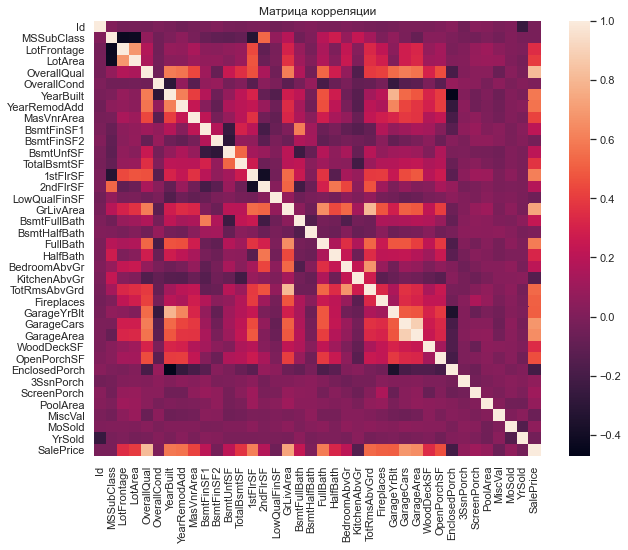

In [29]:
# визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
plt.title("Матрица корреляции")
sns.heatmap(corr_matrix)

In [30]:
# коэффициенты корреляции с целевой переменной
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.730254
GarageCars       0.680625
GarageArea       0.650888
1stFlrSF         0.608955
FullBath         0.594771
YearBuilt        0.584443
YearRemodAdd     0.565608
TotRmsAbvGrd     0.539998
Fireplaces       0.508925
GarageYrBlt      0.501656
OpenPorchSF      0.459948
MasVnrArea       0.420319
LotArea          0.399923
TotalBsmtSF      0.372838
LotFrontage      0.346375
WoodDeckSF       0.343039
HalfBath         0.320925
BsmtFullBath     0.238945
BedroomAbvGr     0.209043
BsmtUnfSF        0.208233
BsmtFinSF1       0.208099
2ndFlrSF         0.180778
ScreenPorch      0.105857
PoolArea         0.069949
3SsnPorch        0.058827
MoSold           0.057330
OverallCond     -0.001794
BsmtHalfBath    -0.004890
Id              -0.017942
MSSubClass      -0.020279
BsmtFinSF2      -0.030361
YrSold          -0.037263
LowQualFinSF    -0.054513
MiscVal         -0.067054
KitchenAbvGr    -0.144278
EnclosedPorch   -0.207263
Name: SalePr

In [31]:
# матрица корреляции для тех признаков, у которых коэффициент корреляции с целевым признаком > 0.5
high_corr_matrix = df[corr_matrix.index[abs(corr_matrix["SalePrice"]) > 0.5]].corr()

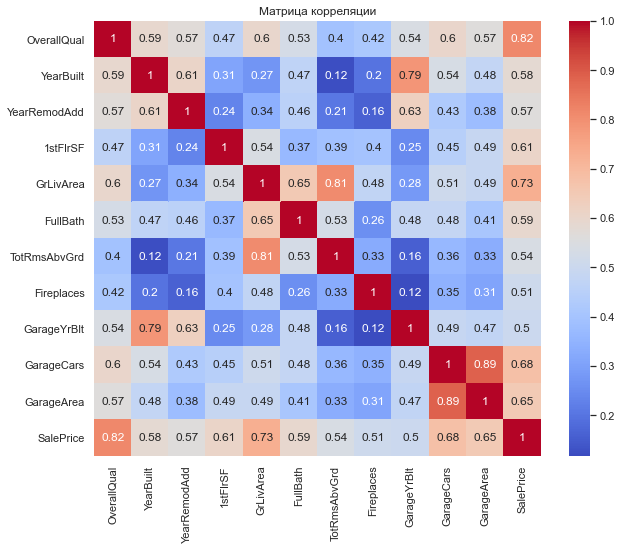

In [32]:
# визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
plt.title("Матрица корреляции")
sns.heatmap(high_corr_matrix, annot=True, cmap="coolwarm")

In [33]:
# признаки, имеющие коэффициенты корреляции > 0.5
high_corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.730254
GarageCars      0.680625
GarageArea      0.650888
1stFlrSF        0.608955
FullBath        0.594771
YearBuilt       0.584443
YearRemodAdd    0.565608
TotRmsAbvGrd    0.539998
Fireplaces      0.508925
GarageYrBlt     0.501656
Name: SalePrice, dtype: float64

In [34]:
# признаки, имеющие сильную корреляцию с целевой переменной
numerical_strong_corr = ['OverallQual','TotalBsmtSF','GrLivArea', 
                         'GarageCars', 'FullBath','YearBuilt','YearRemodAdd'] 

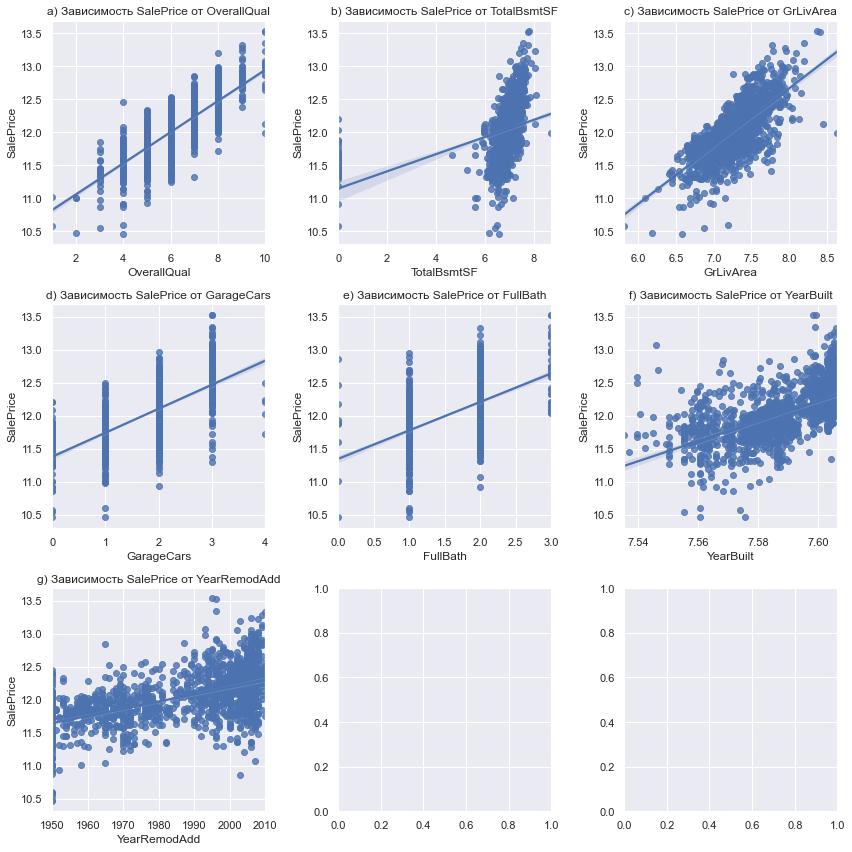

In [35]:
# графики отношения признаков, имеющих сильную корреляцию с целевой переменной, с целевой переменной
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i in range(len(numerical_strong_corr)):
    sns.regplot(x=df[numerical_strong_corr[i]], y=df['SalePrice'], 
                ax=axs[i // 3][i % 3]).set_title(f'{chr(i + 97)}) ' + f"Зависимость SalePrice от {numerical_strong_corr[i]}")
plt.tight_layout()

Признаки GarageArea, 1stFlrSF, GarageYrBlt, TotRmsAbvGrd сильно коррелируют с признаками GarageCars, TotalBsmtSF, YearBuilt, GrLivArea. Поэтому, отнесем их к слабо коррелирующим признакам и, впоследствии, удалим из датасета.

In [36]:
# признаки, имеющие слабую корреляцию с целевой переменной
numerical_weak_corr = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 
                       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'BsmtFullBath', 
                       'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                       'GarageYrBlt', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 

In [37]:
# отбрасывание чпризнаков, слабо коррелирующих с целевой переменной
df.drop(numerical_weak_corr, inplace= True, axis = 1)

# Преобразование категориальных признаков в числовые

In [38]:
# применение one-hot кодирования
df = pd.get_dummies(df)

In [39]:
# первые 5 записей датасета
df.head()

,Id,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice,MSZoning_C (all),...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,7,7.602900,2003,6.753438,7.444833,2,2.0,12.247699,0,...,0,0,0,1,0,0,0,0,1,0
1,2,6,7.589336,1976,7.141245,7.141245,2,2.0,12.109016,0,...,0,0,0,1,0,0,0,0,1,0
2,3,7,7.601902,2002,6.825460,7.488294,2,2.0,12.317171,0,...,0,0,0,1,0,0,0,0,1,0
3,4,7,7.557995,1970,6.629363,7.448916,1,3.0,11.849405,0,...,0,0,0,1,1,0,0,0,0,0
4,5,8,7.601402,2000,7.044033,7.695758,2,3.0,12.429220,0,...,0,0,0,1,0,0,0,0,1,0


In [40]:
# разделение датасета на обучающую и тестовую выборки
y_train = df.SalePrice[:train.shape[0]]
test_id = test['Id']
df.drop(['SalePrice', 'Id'], inplace=True, axis=1)
X_train = df[:train.shape[0]]
X_test = df[train.shape[0]:]

# Подбор гиперпараметров и обучение моделей

## Linear Regressor

In [43]:
# подбираемые гиперпараметры
grid_params = {
    'fit_intercept' : [True, False], 
    'normalize': [True, False], 
    'copy_X': [True, False]
}

# модель, предназначенная для поиска по сетке
grid_linear = GridSearchCV(LinearRegression(), grid_params, 
                           cv=5, scoring='neg_mean_squared_error')

# обучение и подбор гиперпараметров
grid_linear.fit(X_train, y_train)

# RMSE модели
linear_score = rmse(grid_linear.best_score_)
print(linear_score)

# предсказанные значения
linear_predict = np.exp(grid_linear.predict(X_test))

0.15170546694396803


## Ridge Regressor

In [44]:
# подбираемые гиперпараметры
grid_params = {
    'alpha' : list(np.arange(0.1, 1.1, 0.1)),
    'fit_intercept': [True, False],
    'normalize': [False, True],
    'solver': ['auto', 'svd', 'cholesky'],
    'tol': [1e-4, 1e-5, 1e-6, 1e-7]
}

# модель, предназначенная для поиска по сетке
grid_ridge = GridSearchCV(Ridge(), grid_params, 
                          cv=5, scoring='neg_mean_squared_error')

# обучение и подбор гиперпараметров
grid_ridge.fit(X_train, y_train)

# RMSE модели
ridge_score = rmse(grid_ridge.best_score_)
print(ridge_score)

# предсказанные значения
ridge_predict = np.exp(grid_ridge.predict(X_test))

0.13830635487404175


## Lasso Regressor

In [45]:
# подбираемые гиперпараметры
grid_params = {
    'alpha': list(np.arange(0.1, 1.1, 0.1)),
    'normalize': [False, True],
    'selection': ['random', 'cyclic'],
    'tol': [1e-4, 1e-5, 1e-6, 1e-7],
}

# модель, предназначенная для поиска по сетке
grid_lasso = GridSearchCV(Lasso(), grid_params, cv=5, scoring='neg_mean_squared_error')

# обучение и подбор гиперпараметров
grid_lasso.fit(X_train, y_train)

# RMSE модели
lasso_score = rmse(grid_lasso.best_score_)
print(lasso_score)

# предсказанные значения
lasso_predict = np.exp(grid_lasso.predict(X_test))

0.2391579818052575


## Elastic Net Regressor

In [46]:
# подбираемые гиперпараметры
grid_params = {
    'alpha' : list(np.arange(0.1, 1.1, 0.1)),
    'max_iter': [1000, 2000, 3000],
    'normalize': [False, True],
    'positive': [False, True],
    'selection': ['cyclic', 'random'],
    'tol': [1e-4, 1e-5, 1e-6, 1e-7],
}

# модель, предназначенная для поиска по сетке
grid_el_net = GridSearchCV(ElasticNet(), grid_params, cv=5, scoring='neg_mean_squared_error')

# обучение и подбор гиперпараметров
grid_el_net.fit(X_train, y_train)

# RMSE модели
el_net_score = rmse(grid_el_net.best_score_)
print(el_net_score)

# предсказанные значения
el_net_predict = np.exp(grid_el_net.predict(X_test))

0.21935648629060925


## DecisionTreeRegressor

In [50]:
# подбираемые гиперпараметры
grid_params = {
    'ccp_alpha' : list(np.arange(0, 1, 0.1)),
    'max_depth' : list(range(5, 15)),
    'max_features' : ["auto", "log2", "sqrt"],
}

# модель, предназначенная для поиска по сетке
grid_tree = GridSearchCV(DecisionTreeRegressor(), grid_params,
                         cv=5, scoring='neg_mean_squared_error')

# обучение и подбор гиперпараметров
grid_tree.fit(X_train, y_train)

# RMSE модели
tree_score = rmse(grid_tree.best_score_)
print(tree_score)

# предсказанные значения
tree_predict = np.exp(grid_tree.predict(X_test))

0.19047220205566073


## K-Neighbors Regressor

In [47]:
# подбираемые гиперпараметры
grid_params = {
    'n_neighbors' : np.arange(5, 40, 2),    
    'weights' : ['uniform','distance'],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute', 'auto'],
    'leaf_size': np.arange(30, 50, 2)
}

# модель, предназначенная для поиска по сетке
grid_kn = GridSearchCV(KNeighborsRegressor(), grid_params, 
                       cv=5, scoring='neg_mean_squared_error')

# обучение и подбор гиперпараметров
grid_kn.fit(X_train, y_train)

# RMSE модели
kn_score = rmse(grid_kn.best_score_)
print(kn_score)

# предсказанные значения
kn_predict = np.exp(grid_kn.predict(X_test))

0.1937888896652641


## Bagging Regressor

In [48]:
# подбираемые гиперпараметры
grid_params = {
    'bootstrap' : [False, True],
    'bootstrap_features' : [False, True],
    'n_estimators' : [10, 15, 20, 25, 30, 40]
}

# модель, предназначенная для поиска по сетке
grid_bag = GridSearchCV(BaggingRegressor(), grid_params, 
                        cv=5, scoring='neg_mean_squared_error')

# обучение и подбор гиперпараметров
grid_bag.fit(X_train, y_train)

# RMSE модели
bag_score = rmse(grid_bag.best_score_)
print(bag_score)

# предсказанные значения
bag_predict = np.exp(grid_bag.predict(X_test))

0.14250449673604335


## Random Forest Regressor

In [49]:
# подбираемые гиперпараметры
grid_params = {
    'min_samples_split' : [2, 4, 6, 8, 10], 
    'n_estimators' : [10, 15, 20, 25, 30, 40]
}

# модель, предназначенная для поиска по сетке
grid_rand_forest = GridSearchCV(RandomForestRegressor(), grid_params, cv=5, scoring='neg_mean_squared_error')

# обучение и подбор гиперпараметров
grid_rand_forest.fit(X_train, y_train)

# RMSE модели
rand_forest_score = rmse(grid_rand_forest.best_score_)
print(rand_forest_score)

# предсказанные значения
rand_forest_predict = np.exp(grid_rand_forest.predict(X_test))

0.14765369200316755


# RMSE всех построенных моделей

In [51]:
# RMSE всех моделей
scores = [linear_score, lasso_score, ridge_score, el_net_score, tree_score, 
          kn_score, bag_score, rand_forest_score]

# имена моделей
model_names = ['Linear', 'Lasso', 'Ridge', 'ElasticNet', 
               'DecissionTree', 'KNeighbors', 'Bagging', 'RandomForest']

# предсказания моделей
predictions = [linear_predict, lasso_predict, ridge_predict, el_net_predict, 
               tree_predict, kn_predict, bag_predict, rand_forest_predict]

# преобразование имен моделей и их предсказаний в датафрейм
df_predictions = pd.DataFrame(dict(zip(model_names, predictions)))

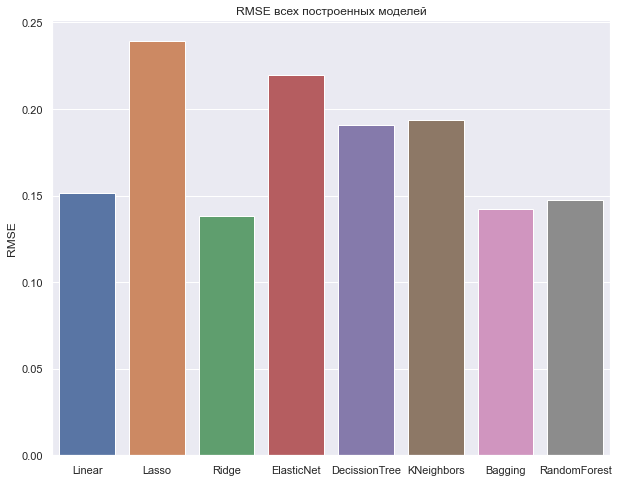

In [53]:
# гистограмма RMSE всех моделей
plt.figure(figsize=(10, 8))
plt.ylabel('RMSE')
plt.title('RMSE всех построенных моделей')
sns.barplot(x=model_names, y=scores)

По гистограмме видно, что модель с регрессором Ridge обладает самой наименьшей ошибкой. Следовательно, эта модель и будет самой наилучшей.

# Корреляция между результатами моделей

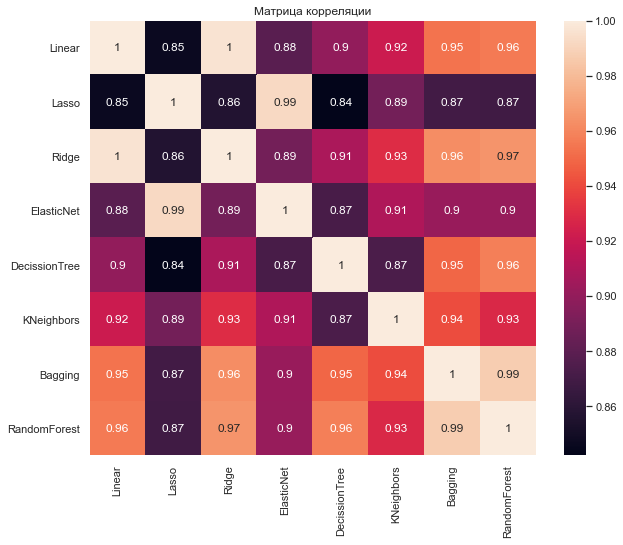

In [55]:
plt.figure(figsize=(10, 8))
plt.title("Матрица корреляции")
sns.heatmap(df_predictions.corr(), annot=True)

Почти для всех моделей прогнозы показывают очень высокую корреляцию друг с другом.

# Загрузка прогнозируем значений в датафрейм

In [56]:
# создание датафрейма, который будет загружен на сайт Kaggle
sub_ridge = pd.DataFrame()

# заполнение атрибута 'Id' данными
sub_ridge['Id'] = test_id

# предсказания модели с Ridge регрессором
sub_ridge['SalePrice'] = ridge_predict

# сохранение датафрейма
sub_ridge.to_csv('ridge_submission.csv', index=False)